# ARIMA 3: Reforço, SARIMA e Introdução ao ARIMAX 
- Revisão / Reforço:
    - AR, MA, ARMA e ARIMA
    - Identificação de AR e MA através do ACF e PACF
    - Modelos incompletos
    - Escrevendo fórmulas de previsão

- SARIMA
- Introdução ao ARIMAX:
    - Atenções necessárias
    - Tipos de variáveis
    - CCF


In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from funcoes import all_ac, plot_forecast, teste_estacionariedade, diagnostico, compara_previsoes
plt.rcParams["figure.figsize"] = [12, 5]

## Modelos Incompletos

Modelo da última aula:

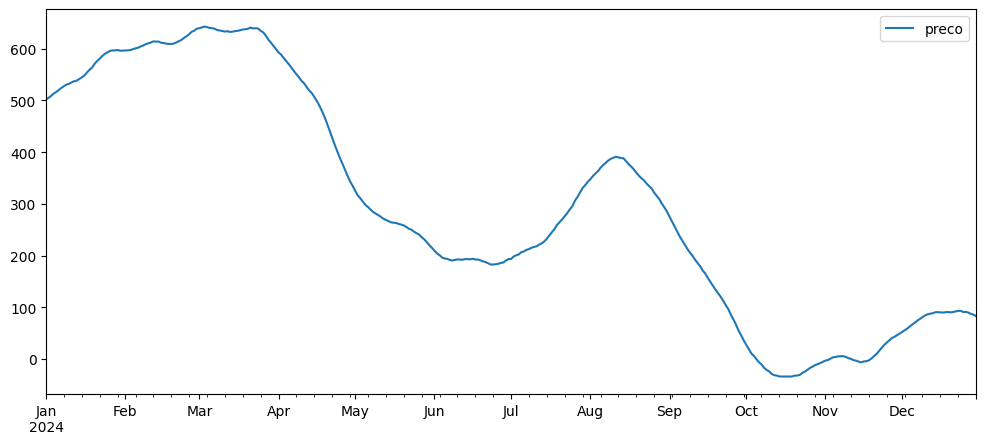

In [2]:
Y = pd.read_csv('../../dados/ARIMA_Exemplo.csv')
Y.index = pd.date_range(start='2024-01-01', periods = 365)
Y.plot()
plt.show()

In [3]:
teste_estacionariedade(Y)

('Não Estacionário', 'Não Estacionário')

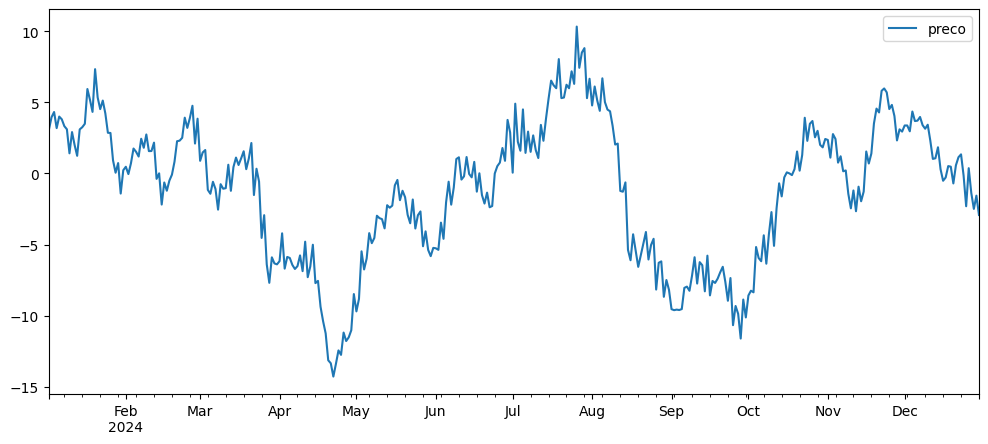

('Estacionário', 'Estacionário')

In [4]:
primeira_ordem = Y.diff().dropna()
primeira_ordem.plot()
plt.show()
teste_estacionariedade(primeira_ordem)

                               SARIMAX Results                                
Dep. Variable:                  preco   No. Observations:                  365
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -514.589
Date:                Fri, 02 May 2025   AIC                           1041.178
Time:                        12:59:42   BIC                           1064.561
Sample:                    01-01-2024   HQIC                          1050.472
                         - 12-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5211      0.053      9.862      0.000       0.418       0.625
ar.L2          0.4296      0.054      7.886      0.000       0.323       0.536
ma.L1         -0.0321      0.025     -1.286      0.1

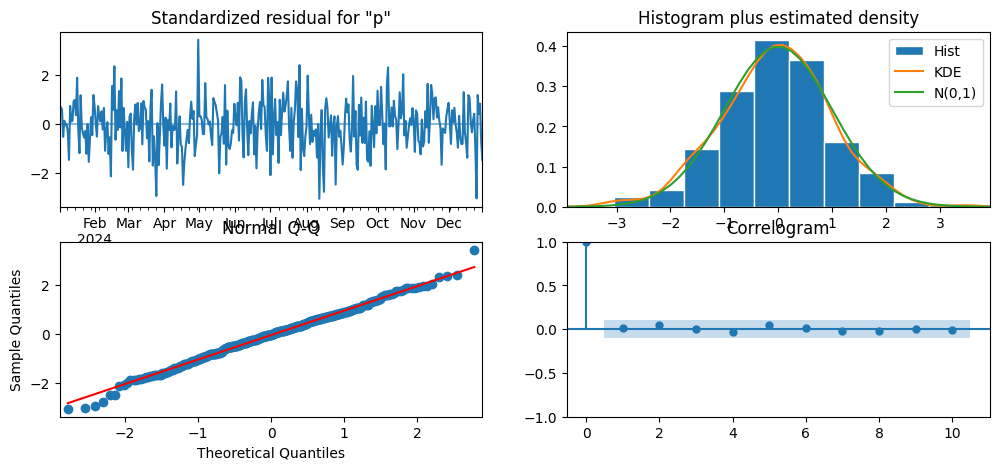

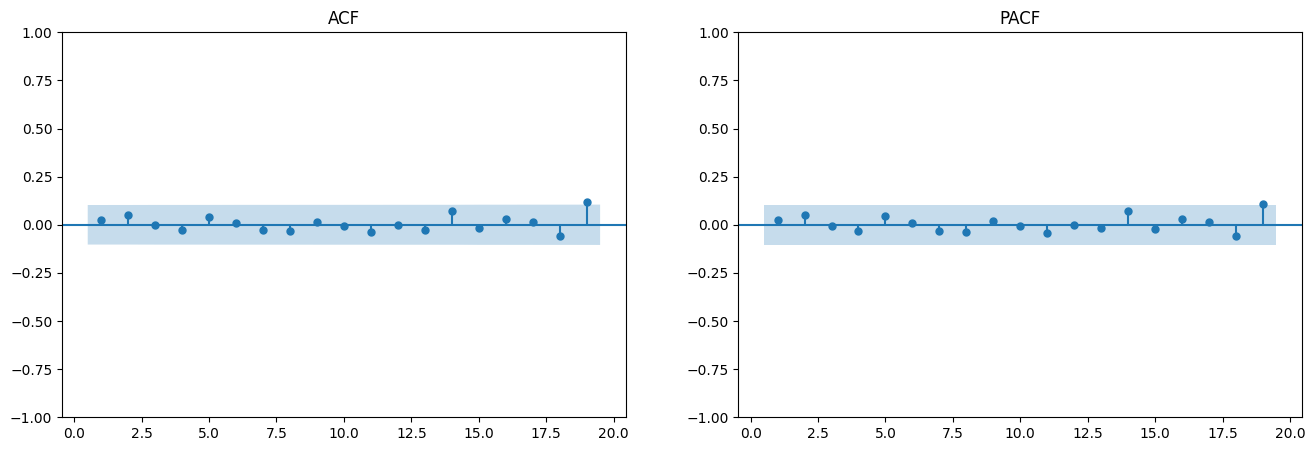

In [5]:
model = ARIMA(Y, order=(2, 1, 3)).fit()
diagnostico(model, lags=19)

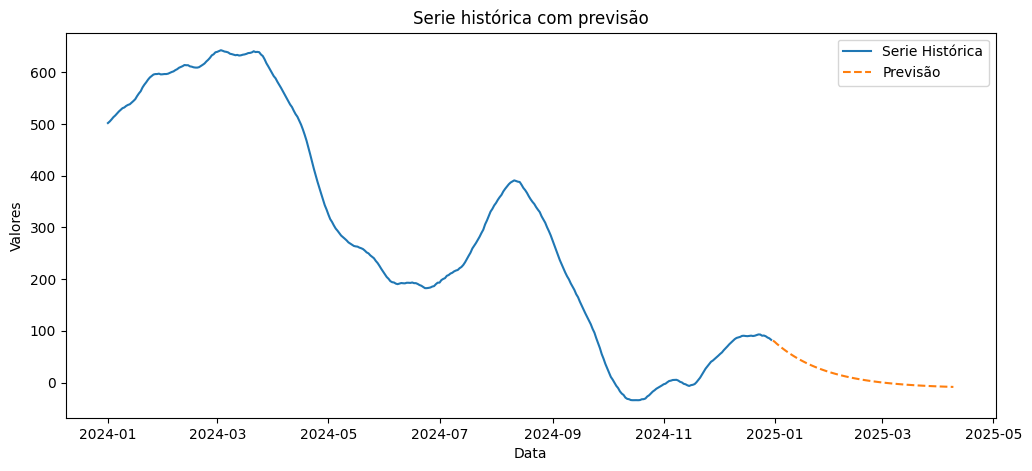

In [6]:
previsao = model.forecast(100)
plot_forecast(Y,previsao)

No Python podemos usar p ou q como tuples: 

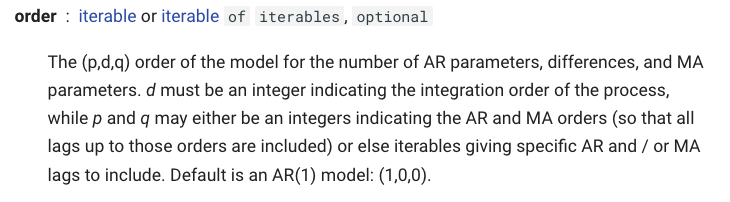

Se quisermos retirar o lag 2 do MA podemos chamar q de (1,0,1)

Da até para tirar mais 1:

                               SARIMAX Results                                
Dep. Variable:                  preco   No. Observations:                  365
Model:               ARIMA(2, 1, [3])   Log Likelihood                -515.275
Date:                Fri, 02 May 2025   AIC                           1038.549
Time:                        12:59:42   BIC                           1054.138
Sample:                    01-01-2024   HQIC                          1044.745
                         - 12-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4931      0.047     10.540      0.000       0.401       0.585
ar.L2          0.4567      0.048      9.528      0.000       0.363       0.551
ma.L3          0.9217      0.023     39.346      0.0

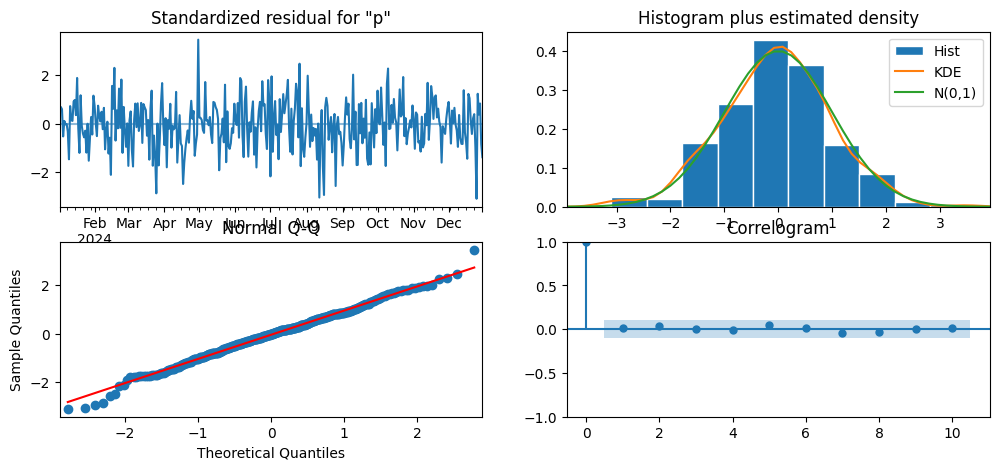

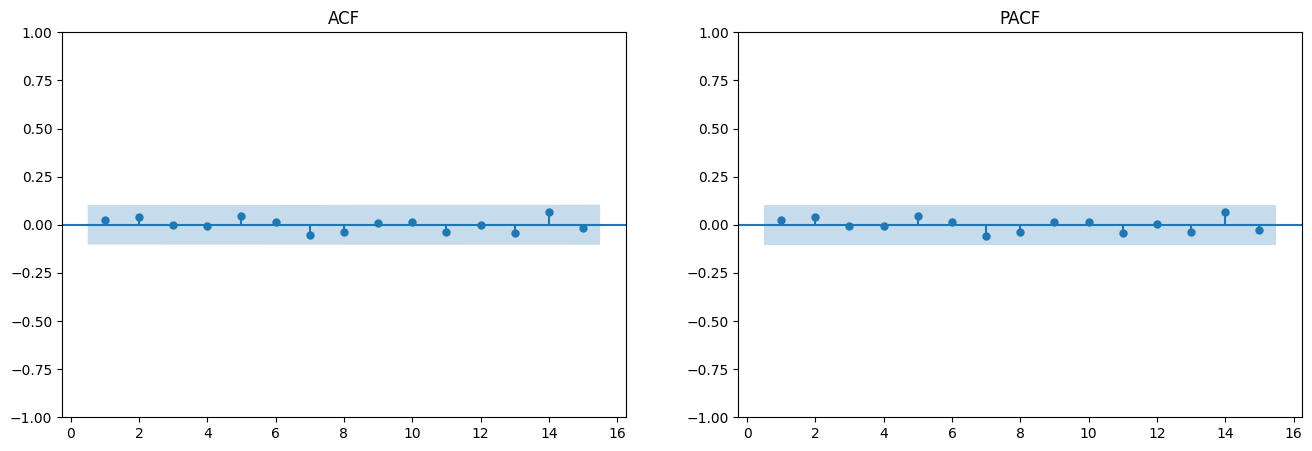

In [7]:
model = ARIMA(Y, order=(2, 1, (0,0,1))).fit()
diagnostico(model)

Reparem que o BIC e o AIC ficaram menores.

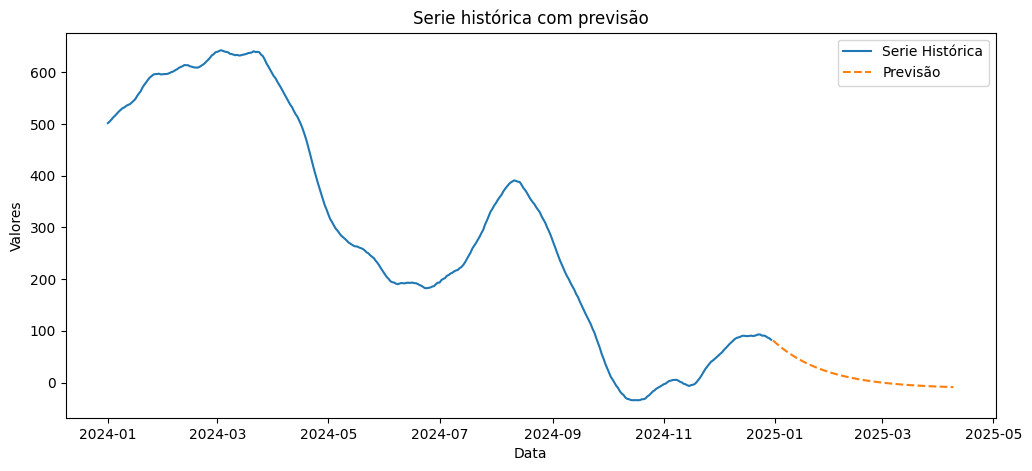

In [8]:
previsao = model.forecast(100)
plot_forecast(Y,previsao)

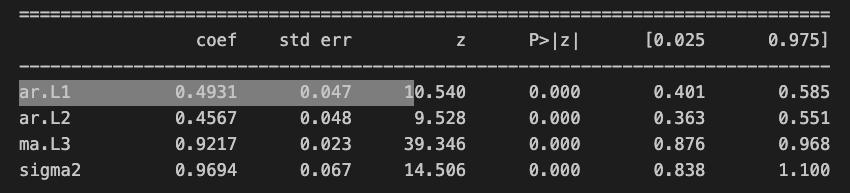

## Fórmula do modelo:
$$ \large (1 - B) Y_t = 0.493 Y_{t-1} + 0.457 Y_{t-2} + 0.922 \epsilon_{t-3} + \epsilon_t $$

$$ (1 - B) Y_t = Y_t - Y_{t-1} $$
ou

$$ \large Y_t = Y_{t-1} + 0.493 Y_{t-1} + 0.457 Y_{t-2} + 0.922 \epsilon_{t-3} + \epsilon_t $$

## SARIMA
nessa parte vamos tentar aplicar modelos para séries sazonais usando as ferramentas que temos em mão:

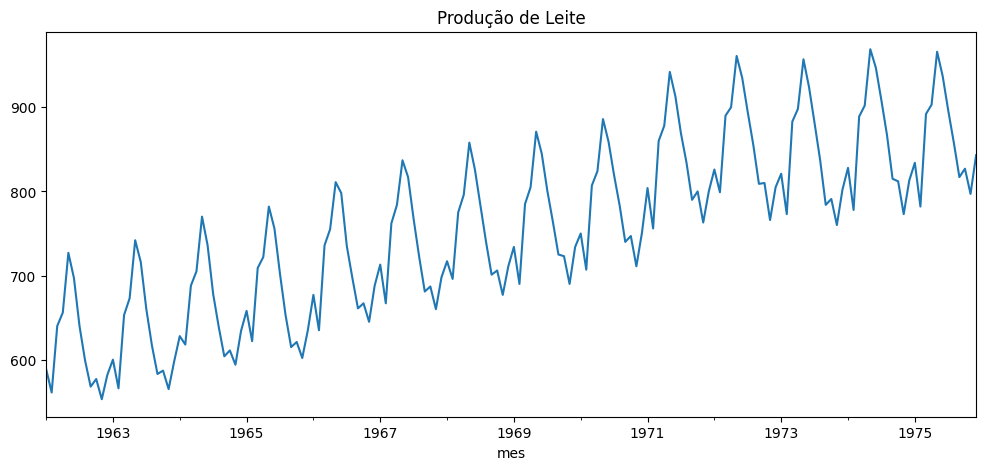

In [9]:
milk = pd.read_csv('../../dados/milk_production.csv')
milk['mes'] = milk['month']
milk.index = pd.to_datetime(milk['mes'])
milk.index.freq = 'MS'
milk_prod = pd.Series(milk['production'], name="produção de leite")
milk_prod.plot()
plt.title('Produção de Leite')
plt.show()

In [10]:
teste_estacionariedade(milk_prod)

('Não Estacionário', 'Não Estacionário')

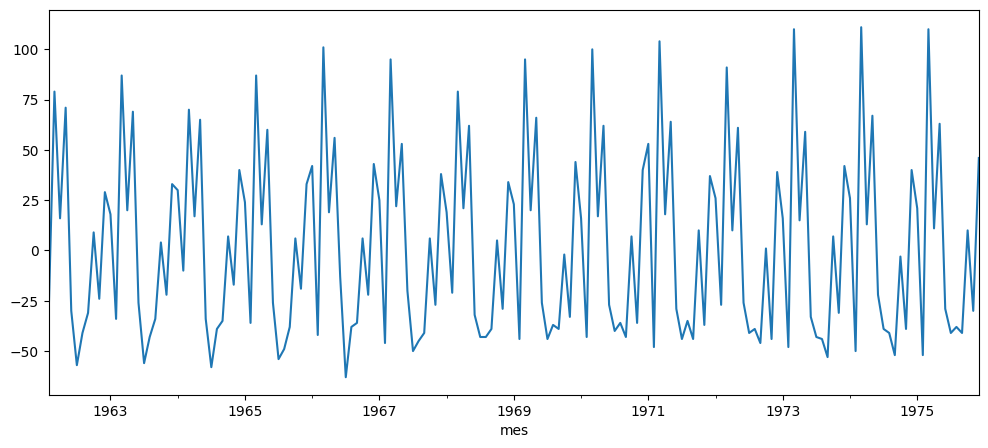

('Estacionário', 'Estacionário')

In [11]:
primeira_ordem = milk_prod.diff().dropna()
primeira_ordem.plot()
plt.show()
teste_estacionariedade(primeira_ordem)

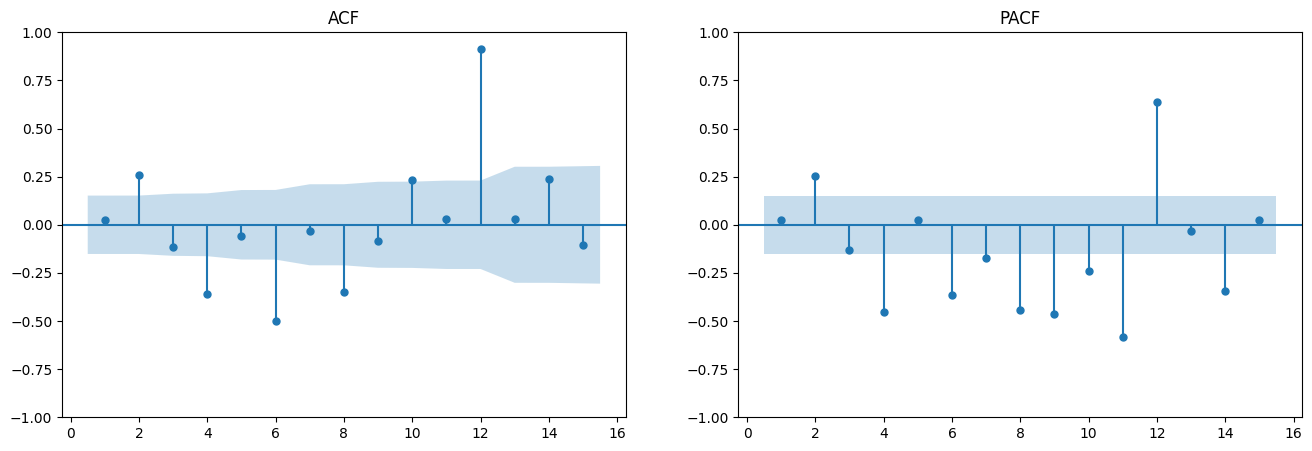

In [12]:
all_ac(primeira_ordem)

Modelos MA aparentam ser um pouco melhor.

                               SARIMAX Results                                
Dep. Variable:      produção de leite   No. Observations:                  168
Model:               ARIMA(0, 1, [2])   Log Likelihood                -861.689
Date:                Fri, 02 May 2025   AIC                           1727.378
Time:                        12:59:43   BIC                           1733.614
Sample:                    01-01-1962   HQIC                          1729.909
                         - 12-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L2          0.4300      0.077      5.557      0.000       0.278       0.582
sigma2      1771.2201    260.113      6.809      0.000    1261.408    2281.032
Ljung-Box (L1) (Q):                   0.39   Jarque-

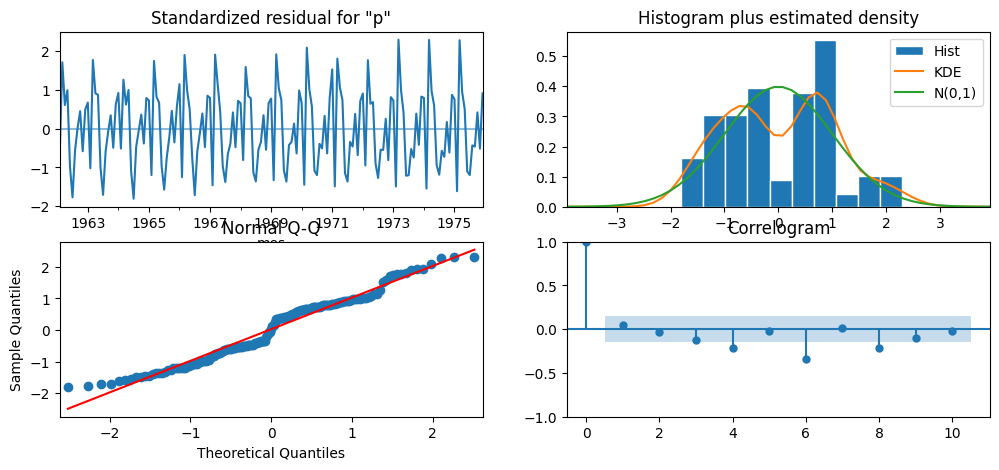

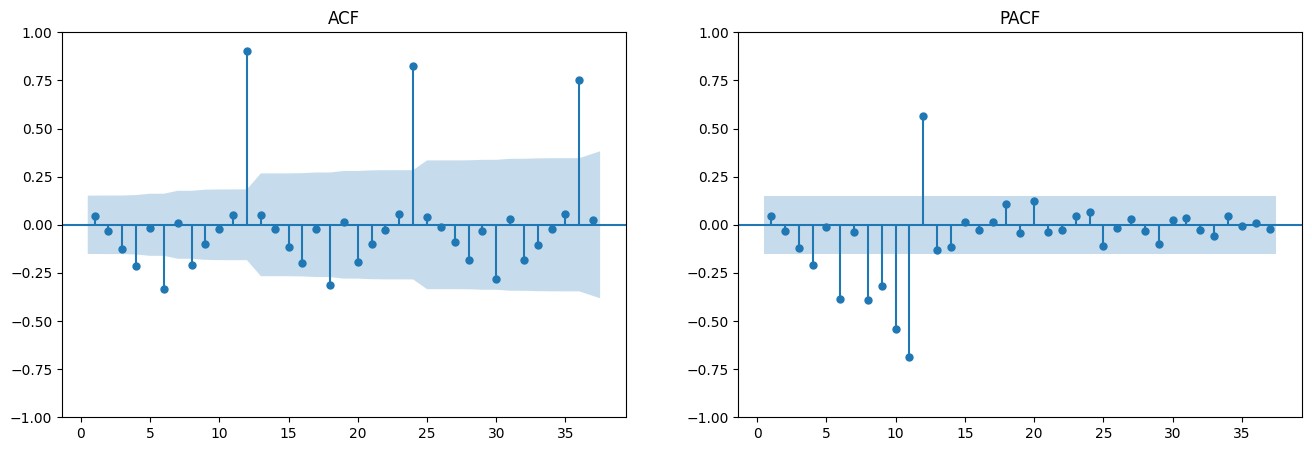

In [13]:
model1 = ARIMA(milk_prod, order = (0,1,(0,1))).fit()
diagnostico(model1, lags=37)

talvez tentar um incompleto com MA 2 e 12:

                                SARIMAX Results                                 
Dep. Variable:        produção de leite   No. Observations:                  168
Model:             ARIMA(0, 1, [2, 12])   Log Likelihood                -791.727
Date:                  Fri, 02 May 2025   AIC                           1589.455
Time:                          12:59:44   BIC                           1598.809
Sample:                      01-01-1962   HQIC                          1593.252
                           - 12-01-1975                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L2          0.3663      0.083      4.433      0.000       0.204       0.528
ma.L12         0.9648      0.104      9.264      0.000       0.761       1.169
sigma2       578.4446    106.795    

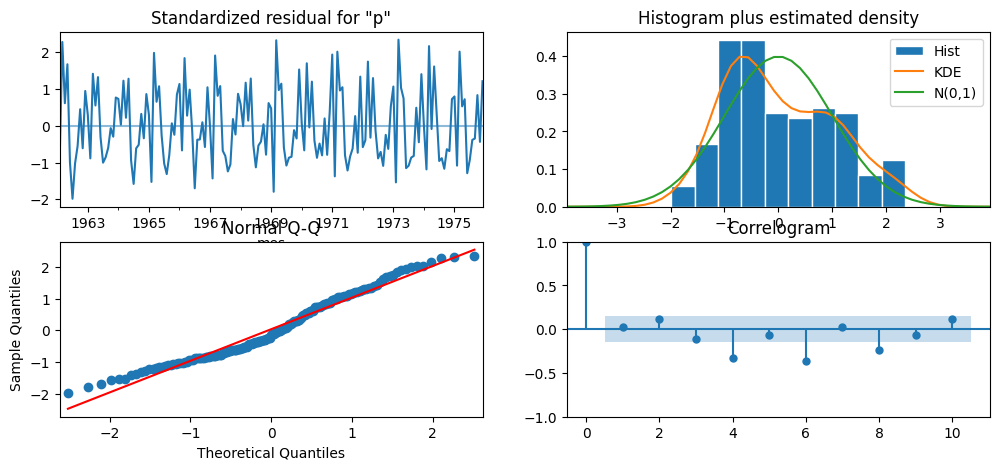

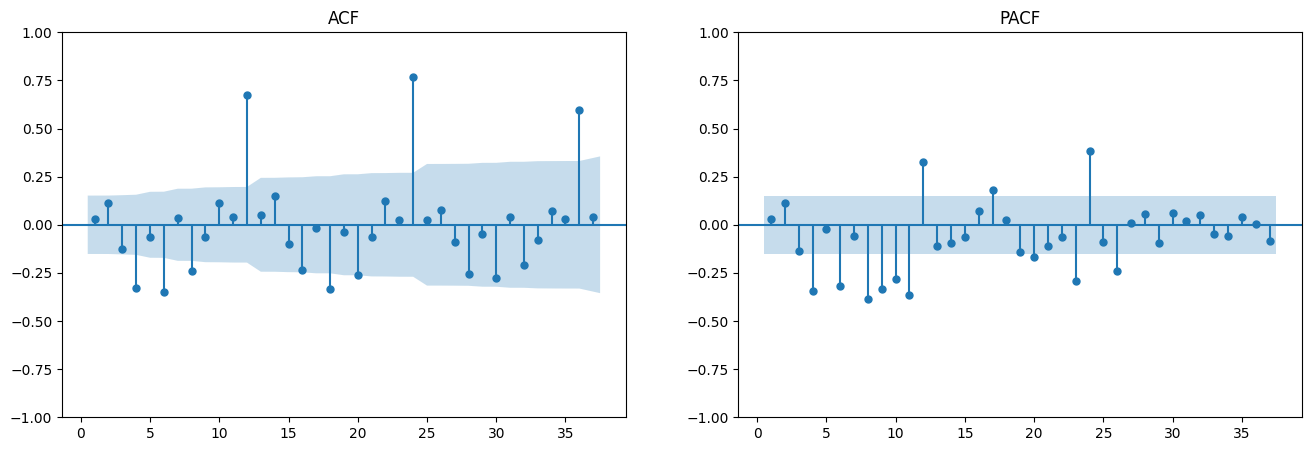

In [14]:
model1 = ARIMA(milk_prod, order = (0,1,(0,1,0,0,0,0,0,0,0,0,0,1)), freq='MS').fit()
diagnostico(model1, lags=37)

/Users/danielferreira/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                SARIMAX Results                                 
Dep. Variable:        produção de leite   No. Observations:                  168
Model:             ARIMA([12], 1, [12])   Log Likelihood                -596.830
Date:                  Fri, 02 May 2025   AIC                           1199.660
Time:                          12:59:44   BIC                           1209.014
Sample:                      01-01-1962   HQIC                          1203.456
                           - 12-01-1975                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L12         0.9979      0.002    637.014      0.000       0.995       1.001
ma.L12        -0.6110      0.068     -8.931      0.000      -0.745      -0.477
sigma2        55.5246      5.384    

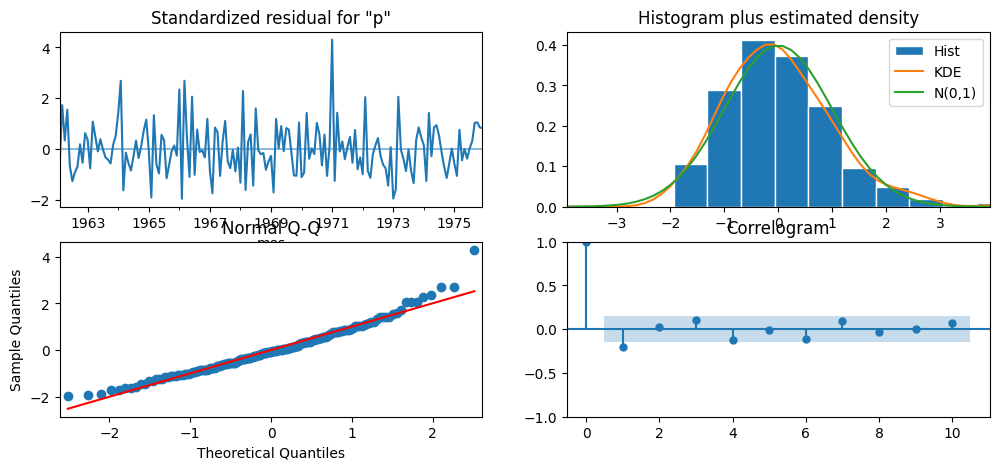

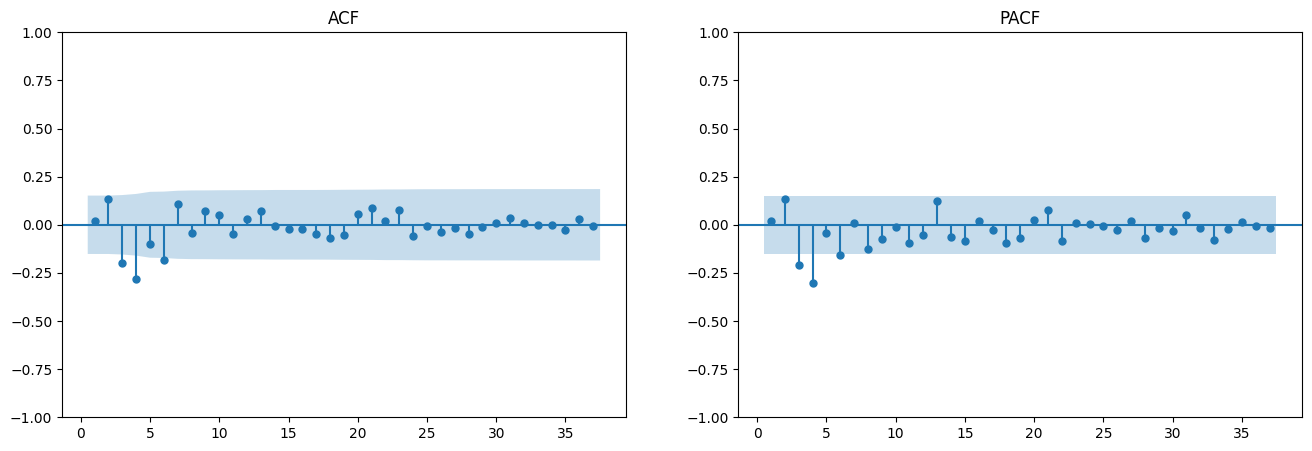

In [15]:
model1 = ARIMA(milk_prod, order = ((0,0,0,0,0,0,0,0,0,0,0,1),1,(0,0,0,0,0,0,0,0,0,0,0,1)), freq='MS').fit()
diagnostico(model1, lags=37)

$$ \large (1 - B) Y_t = 0.9979 Y_{t-12} -0.6110 \epsilon_{t-12} + \epsilon_t $$


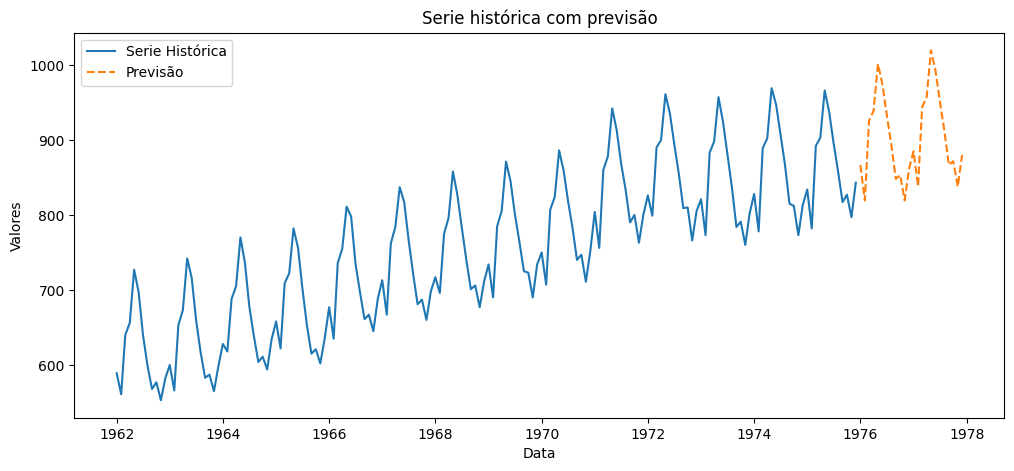

In [16]:
previsao1 = model1.forecast(24)
plot_forecast(milk_prod,previsao1)

Esse modelo não é o pior do mundo, porém podemos usar um SARIMA:

$$
(1 - B)^d (1 - B^s)^D Y_t = c + (1 - \phi_1 B - \dots - \phi_p B^p)(1 - \Phi_1 B^s - \dots - \Phi_P B^{Ps}) Y_t 
+ (1 + \theta_1 B + \dots + \theta_q B^q)(1 + \Theta_1 B^s + \dots + \Theta_Q B^{Qs}) \epsilon_t
$$

SARIMA(1,1,1)(1,1,1)_12
$$
(1 - B)(1 - B^{12}) Y_t = c + (1 - \phi_1 B)(1 - \Phi_1 B^{12}) Y_t + (1 + \theta_1 B)(1 + \Theta_1 B^{12}) \epsilon_t
$$


In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2 = SARIMAX(milk_prod, order = (1,1,0), seasonal_order=(0,1,1,12)).fit(disp=False)

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                    produção de leite   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                              Fri, 02 May 2025   AIC                           1066.207
Time:                                      12:59:45   BIC                           1075.337
Sample:                                  01-01-1962   HQIC                          1069.916
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.6190      0.070     -8.825      0.000      -0.757      -0.482
sigma2        52.6908      4.897     10.759      0.000      43.093      62.289
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

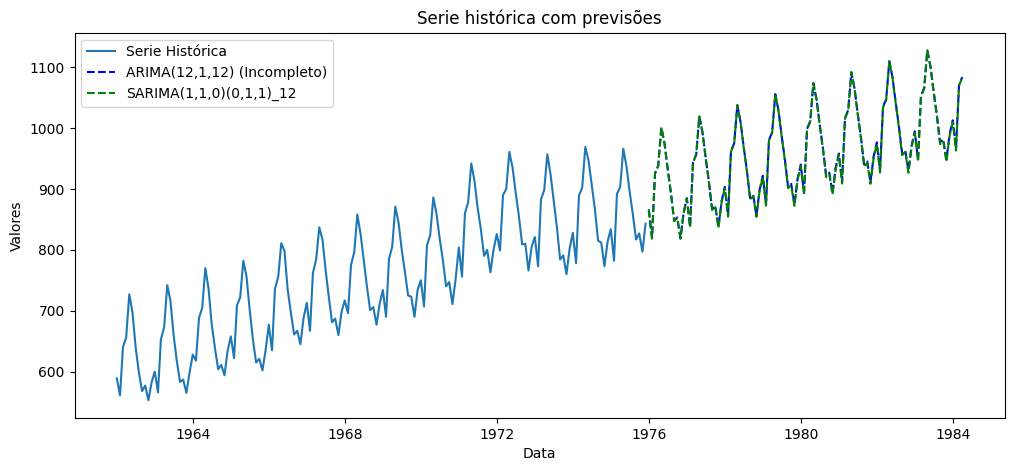

In [19]:
previsao1 = model1.forecast(100)
previsao2 = model2.forecast(100)
compara_previsoes(milk_prod, [previsao1,previsao2], ['ARIMA(12,1,12) (Incompleto)', 'SARIMA(1,1,0)(0,1,1)_12'])

Mais um exemplo:

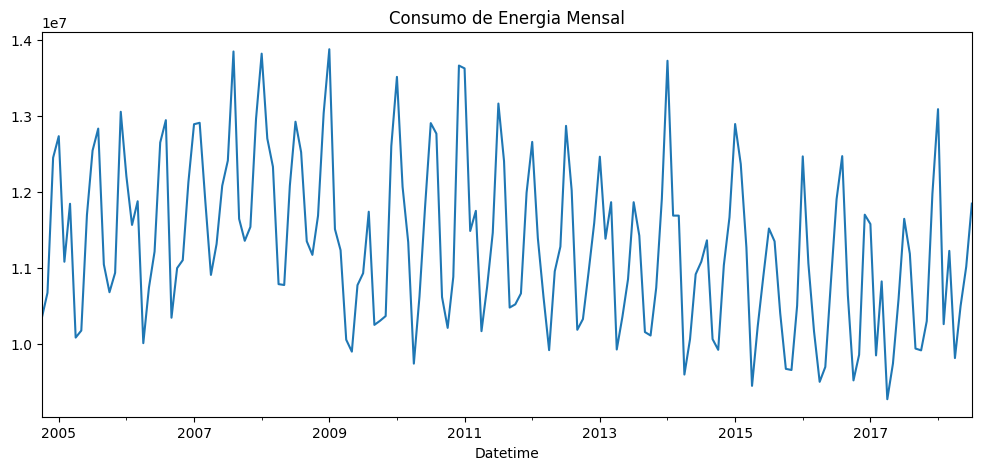

In [20]:
df = pd.read_csv('../../dados/AEP_hourly.csv')
df = df.set_index(pd.to_datetime(df['Datetime']))
aep = df['AEP_MW'].resample('MS').sum()
aep = aep[:-1]
aep.plot()
plt.title('Consumo de Energia Mensal')
plt.show()

In [21]:
teste_estacionariedade(aep)

('Não Estacionário', 'Não Estacionário')

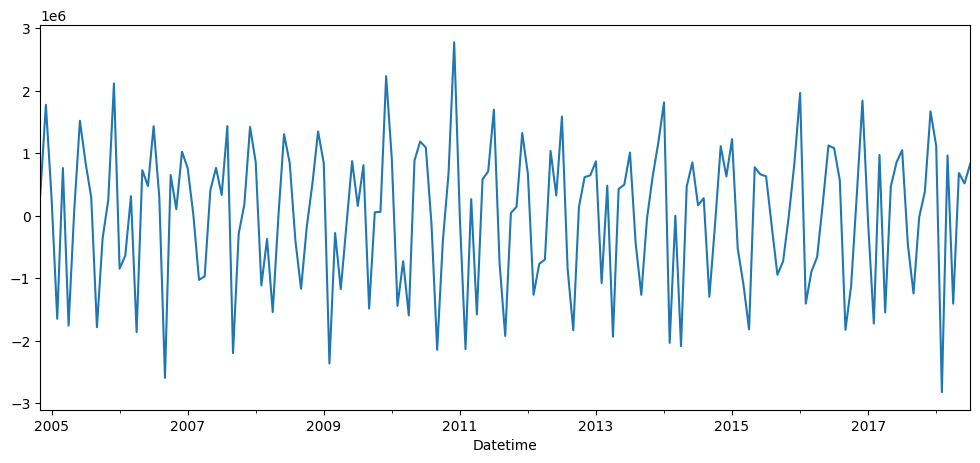

('Estacionário', 'Estacionário')

In [22]:
primeira_ordem = aep.diff().dropna()
primeira_ordem.plot()
plt.show()
teste_estacionariedade(primeira_ordem)

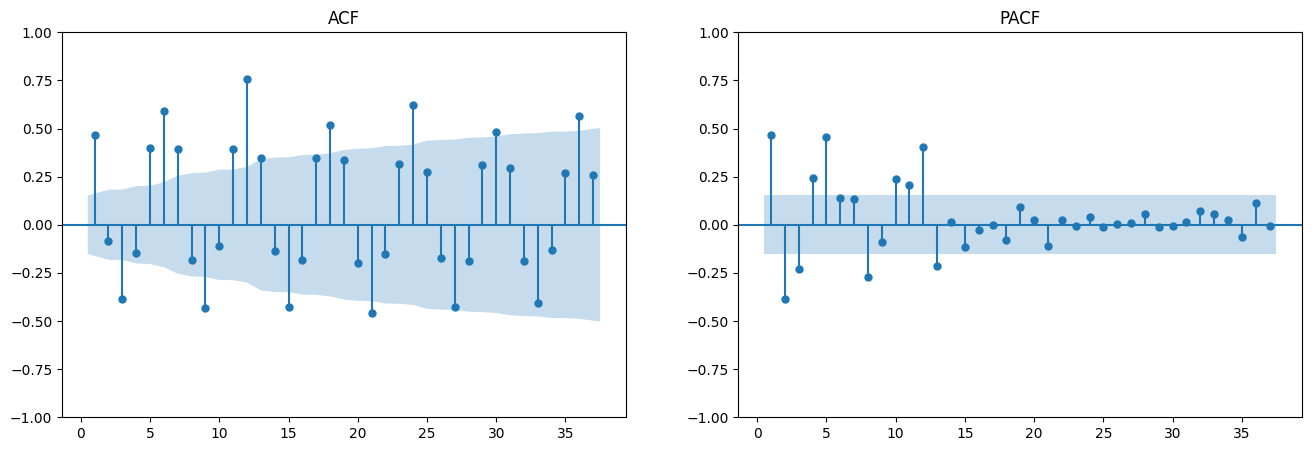

In [23]:
all_ac(aep, lags = 37)

                               SARIMAX Results                                
Dep. Variable:                 AEP_MW   No. Observations:                  166
Model:              ARIMA([12], 1, 0)   Log Likelihood               -2509.994
Date:                Fri, 02 May 2025   AIC                           5023.988
Time:                        12:59:45   BIC                           5030.200
Sample:                    10-01-2004   HQIC                          5026.509
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L12         0.5109      0.008     64.515      0.000       0.495       0.526
sigma2      4.722e+11   4.18e-15   1.13e+26      0.000    4.72e+11    4.72e+11
Ljung-Box (L1) (Q):                   0.46   Jarque-

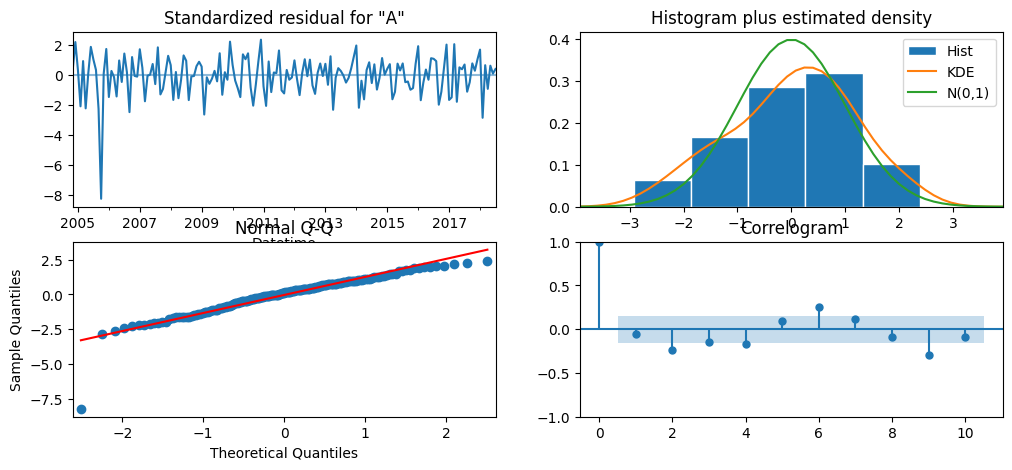

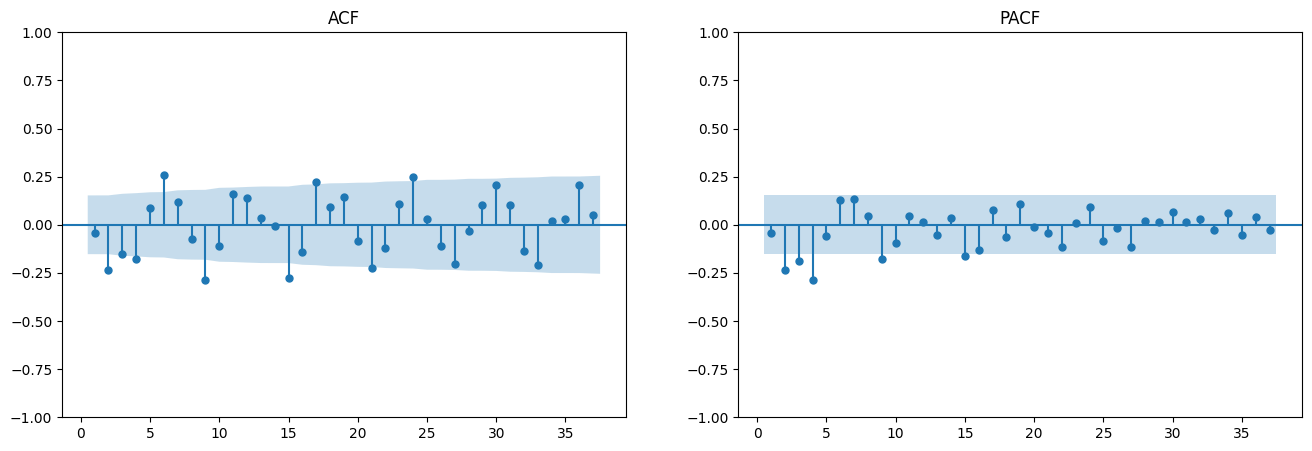

In [24]:
# ARIMA (12,1,1) AR incompleto
model1 = ARIMA(aep, order = ((0,0,0,0,0,0,0,0,0,0,0,1),1,0), freq='MS').fit()
diagnostico(model1, lags=37)

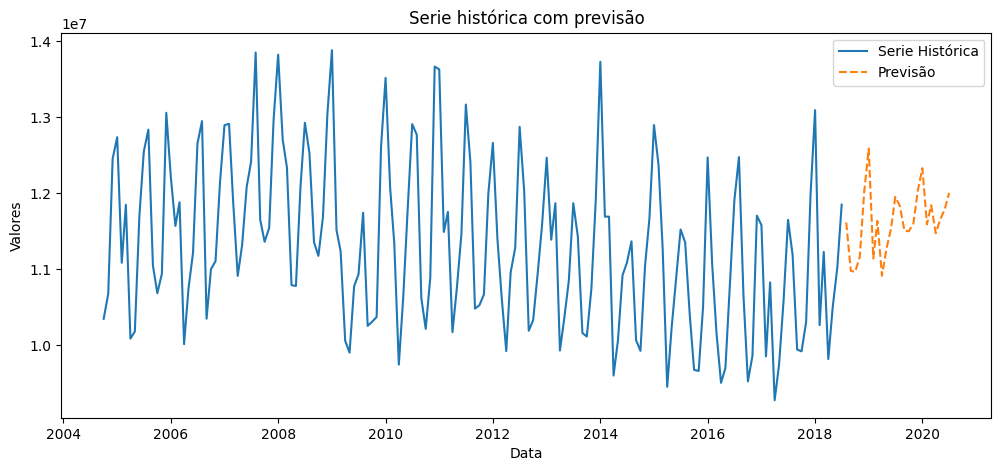

In [25]:
previsao1 = model1.forecast(24)
plot_forecast(aep,previsao1)

                                     SARIMAX Results                                      
Dep. Variable:                             AEP_MW   No. Observations:                  166
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -2272.854
Date:                            Fri, 02 May 2025   AIC                           4549.709
Time:                                    12:59:45   BIC                           4555.769
Sample:                                10-01-2004   HQIC                          4552.171
                                     - 07-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2066      0.030     -6.857      0.000      -0.266      -0.148
sigma2      4.378e+11   1.04e-15   

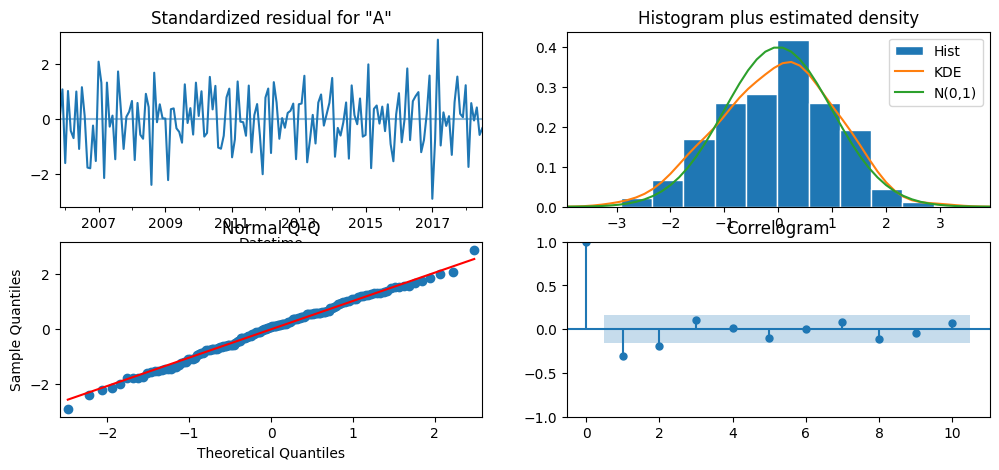

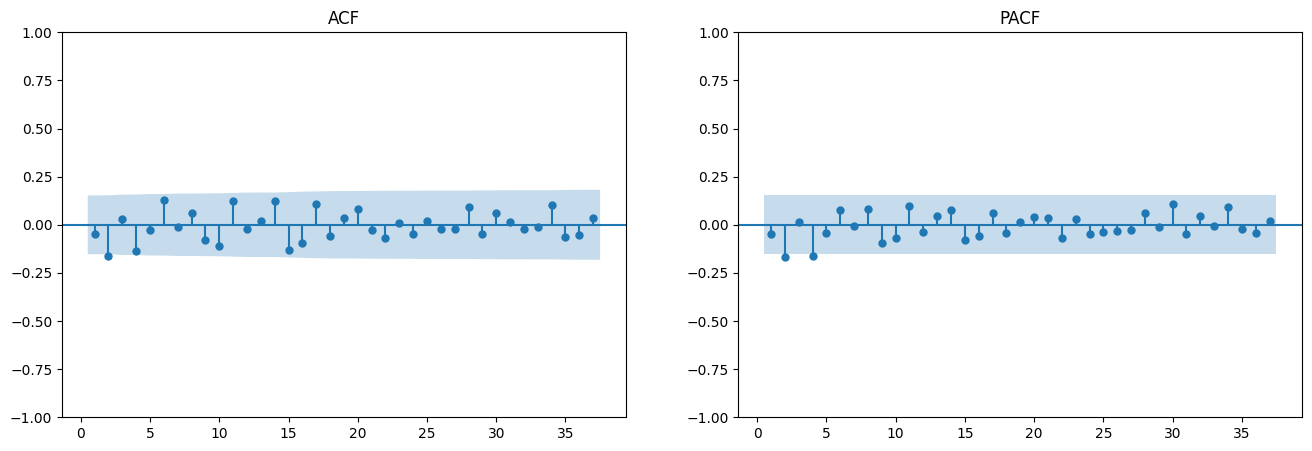

In [26]:
model2 = SARIMAX(aep, order = (0,1,0), seasonal_order=(1,1,0,12)).fit(disp=False)
diagnostico(model2, lags=37)

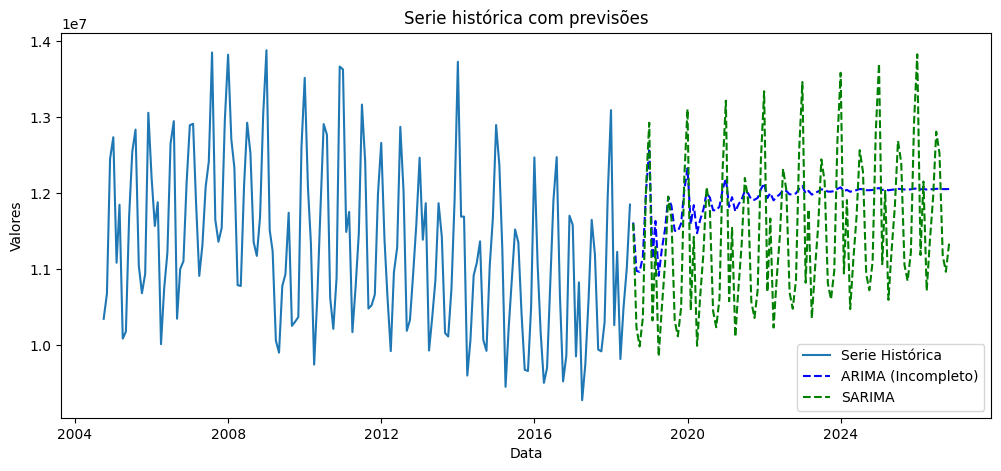

In [27]:
previsao1 = model1.forecast(100)
previsao2 = model2.forecast(100)
compara_previsoes(aep, [previsao1,previsao2], ['ARIMA (Incompleto)','SARIMA'])

Discussão, o que faz essa diferença de previsões? Tip: se tirar a diferencição sazonal as previsões ficam parecidas.

## Identificação de SARIMA:
1) ACF/PACF com picos em intervalos fixos
2) Análise do seasonal decompose 

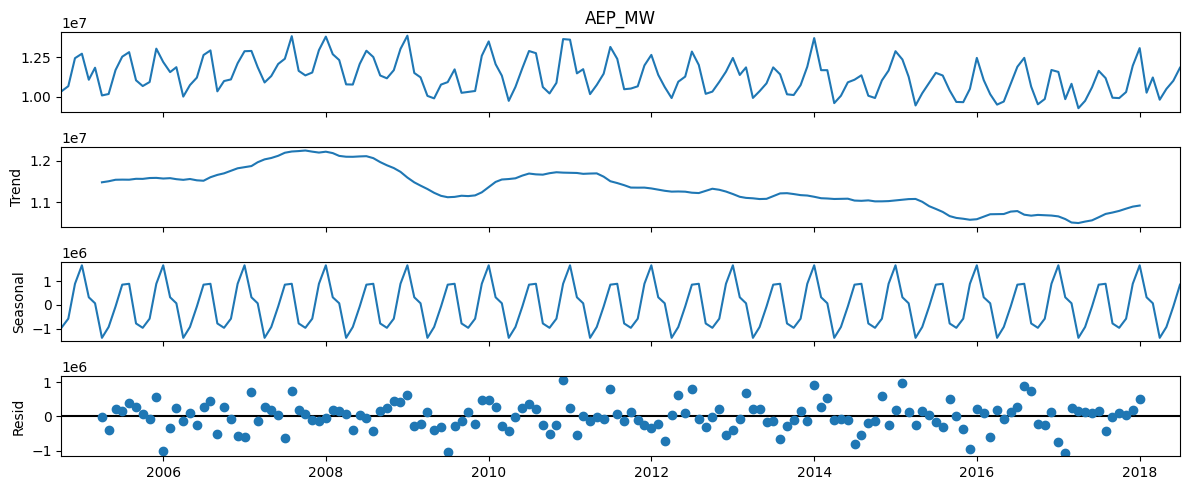

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(aep)
decomp.plot()
plt.show()

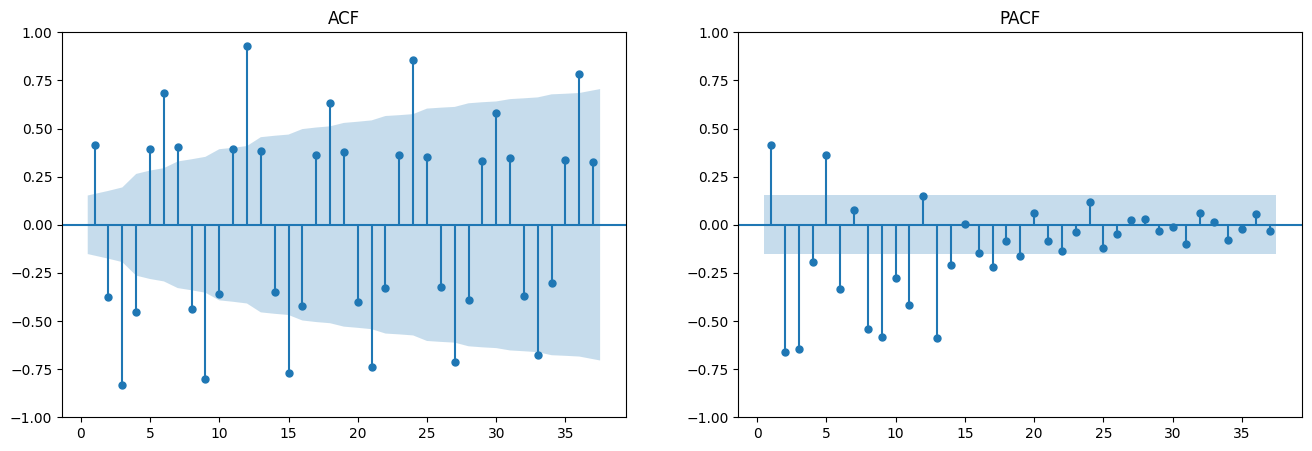

In [29]:
all_ac(decomp.seasonal, lags = 37)

## ARIMAX
### CCF

In [30]:
df = pd.read_csv('../../dados/clicks_original.csv')
df.index = pd.to_datetime(df['date'])
df = df.drop(['date'], axis=1)
df

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_66983/3196411573.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df['date'])


,price,location,clicks
date,,,
2008-04-01,43.155647,2,18784
2008-04-02,43.079056,1,24738
2008-04-03,43.842609,2,15209
2008-04-04,43.312376,1,14018
2008-04-05,43.941176,1,11974
...,...,...,...
2008-08-09,44.182033,1,6716
2008-08-10,43.608260,1,9523
2008-08-11,43.553363,1,8881


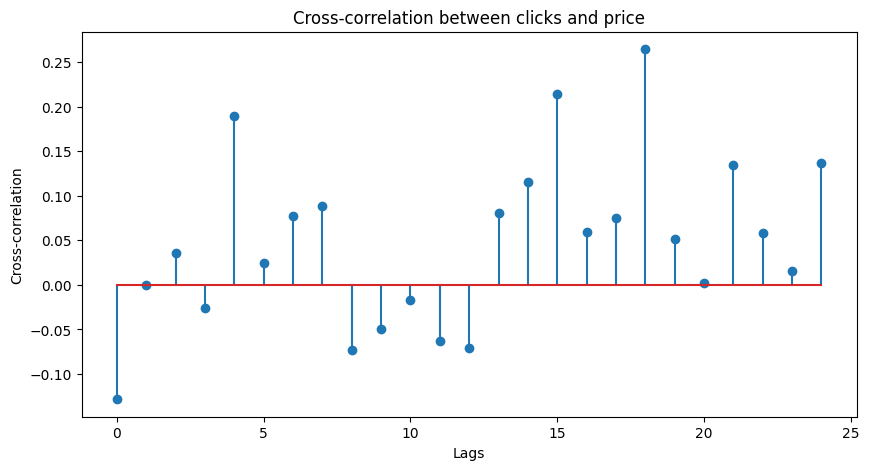

In [31]:
from statsmodels.tsa.stattools import ccf

y = df['clicks']
x = df['price']
cross_corr = ccf(y, x, nlags=25)


lags = np.arange(len(cross_corr))
plt.figure(figsize=(10, 5))
plt.stem(lags, cross_corr)
plt.xlabel('Lags')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between clicks and price')
plt.show()

In [32]:
for l in range(0,10):
    c = y.corr(x.shift(l))
    print(f'lag = {l} - corr = {c}')

lag = 0 - corr = -0.12823083666506582
lag = 1 - corr = -0.000537636751975811
lag = 2 - corr = 0.038431523905486875
lag = 3 - corr = -0.02782575735070981
lag = 4 - corr = 0.20179614567633497
lag = 5 - corr = 0.025422372009974655
lag = 6 - corr = 0.07980197105818732
lag = 7 - corr = 0.0917826371757138
lag = 8 - corr = -0.0807955741297609
lag = 9 - corr = -0.05567033830600445


Infelizmente o ccf do python não possui opções de calcular para lags futuros, mas podemos fazer na mão:

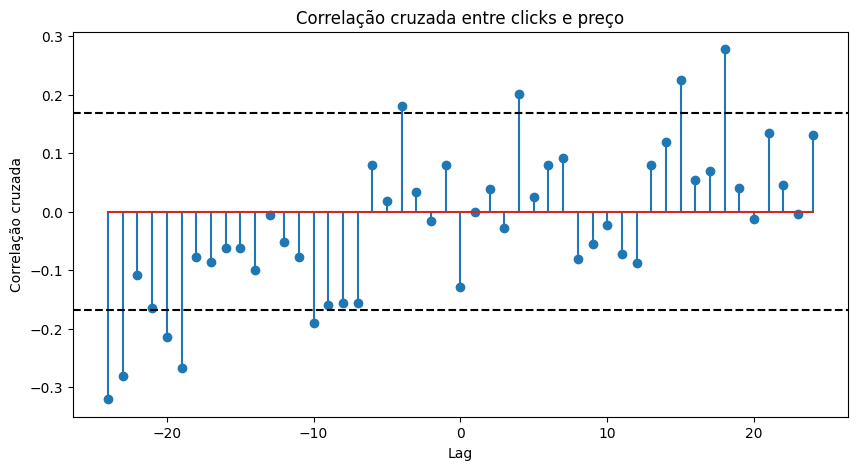

In [33]:
max_lag = 24
correlations = []
lags = range(-max_lag, max_lag + 1)

for l in lags:
    c = y.corr(x.shift(l))
    correlations.append(c)

plt.figure(figsize=(10, 5))
plt.stem(lags, correlations)
plt.xlabel('Lag')
plt.ylabel('Correlação cruzada')
plt.title('Correlação cruzada entre clicks e preço')
conf_interval = 1.96 / np.sqrt(len(df))
plt.axhline(-conf_interval, color='k', ls='--')
plt.axhline(conf_interval, color='k', ls='--')
plt.show()